# Importing Neccessary Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Loading the Built-in Sklearn Breast Cancer Dataset

In [4]:
cancerData = pd.read_csv("data.csv", sep=',')
cancerData.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
cancerData.drop(columns=['id', 'Unnamed: 32'], inplace=True)

In [6]:
X = cancerData.drop(columns=['diagnosis'])
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
y = cancerData.diagnosis

In [8]:
X.shape

(569, 30)

# Splitting into Train and Test datasets

In [9]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.1,stratify=y)

In [10]:
X_train.shape

(512, 30)

In [11]:
y_test.shape

(57,)

# Applying StandardScaler()

In [12]:
scaler = MinMaxScaler()

In [13]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshaping the dataset to 3-D to pass it through CNN

In [14]:
X_train = X_train.reshape(512,30,1)
X_test = X_test.reshape(57,30,1)

<h2>Converting Categorical Data into Numeric</h2>

In [15]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
le = LabelEncoder()

# Fit and transform your labels
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


# Preparing the Model

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, MaxPooling1D, BatchNormalization, Activation
from tensorflow.keras.regularizers import l1
from tensorflow.keras.layers import LeakyReLU

model = Sequential()

# First Conv1D layer with Batch Normalization and L1 regularization
model.add(Conv1D(filters=32, kernel_size=2, input_shape=(30, 1), 
                 kernel_regularizer=l1(0.01)))  # Adjust L1 strength as needed
model.add(BatchNormalization())
model.add(Activation('relu'))

# Second Conv1D layer with Batch Normalization and L1 regularization
model.add(Conv1D(filters=64, kernel_size=2, 
                 kernel_regularizer=l1(0.01)))  # Adjust L1 strength as needed
model.add(BatchNormalization())
model.add(Activation('relu'))

# Third Conv1D layer with smaller kernel size to avoid shrinking input too fast and L1 regularization
model.add(Conv1D(filters=128, kernel_size=1, 
                 kernel_regularizer=l1(0.01)))  # Adjust L1 strength as needed
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))

# Fourth Conv1D layer with L1 regularization
model.add(Conv1D(filters=128, kernel_size=2, 
                 kernel_regularizer=l1(0.01)))  # Adjust L1 strength as needed
model.add(BatchNormalization())
model.add(Activation('relu'))

# MaxPooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output before feeding it into Dense layers
model.add(Flatten())

# Dense layers with L1 regularization
model.add(Dense(256, activation='relu', kernel_regularizer=l1(0.01)))  # Adjust L1 strength as needed
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=l1(0.01)))  # Adjust L1 strength as needed
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


D:\MINU\S-7\deeplearning\project\DeepENV\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\MINU\S-7\deeplearning\project\DeepENV\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 29, 32)              │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 29, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 29, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 28, 64)              │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 28, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 28, 128)             │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 28, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 27, 128)             │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 27, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 27, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 13, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1664)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         426,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 506,145 (1.93 MB)

 Trainable params: 505,441 (1.93 MB)

 Non-trainable params: 704 (2.75 KB)

In [18]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit(X_train,y_train_encoded,epochs=100,verbose=1,validation_data=(X_test,y_test_encoded))

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6257 - loss: 167.6415 - val_accuracy: 0.8947 - val_loss: 162.8592
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7839 - loss: 161.0828 - val_accuracy: 0.6316 - val_loss: 156.5848
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8420 - loss: 154.7161 - val_accuracy: 0.6316 - val_loss: 150.2674
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8821 - loss: 148.3179 - val_accuracy: 0.6316 - val_loss: 143.9694
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8971 - loss: 142.0221 - val_accuracy: 0.6316 - val_loss: 137.7455
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9369 - loss: 135.7805 - val_accuracy: 0.6316 - val_loss: 131.6272
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8583 - loss: 129.7787 - val_accuracy: 0.6316 - val_loss: 125.6436
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9286 - loss: 123.

# Plots of Accuracy and Loss

In [20]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

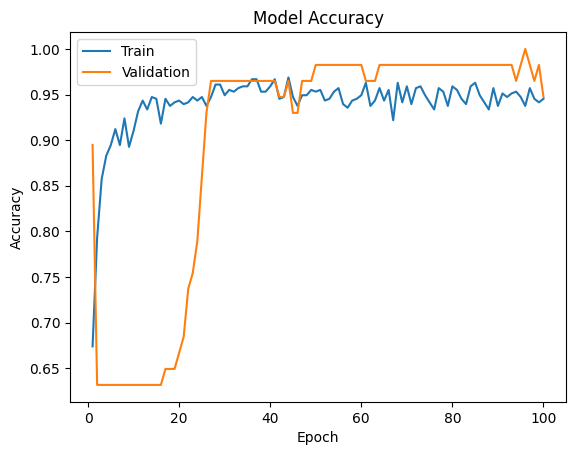

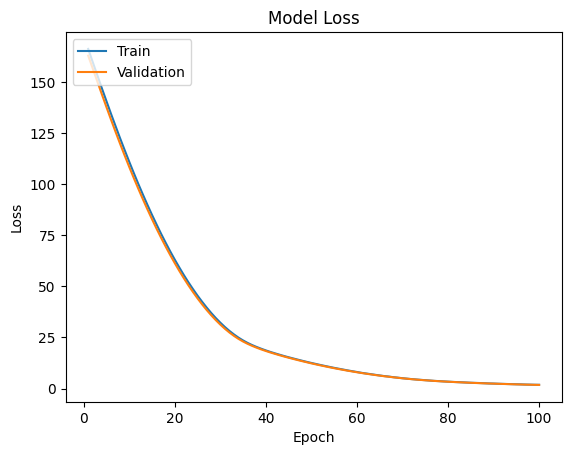

In [21]:
plotLearningCurve(history,100)

In [22]:
model2 = Sequential()

# First dense layer
model2.add(Dense(64, activation='relu', input_shape=(30,)))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

# Second dense layer
model2.add(Dense(32, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

# Output layer for binary classification
model2.add(Dense(1, activation='sigmoid'))


D:\MINU\S-7\deeplearning\project\DeepENV\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,481 (17.50 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 192 (768.00 B)

In [24]:
model2.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
# Now fit the model with the reshaped data
history2 = model2.fit(X_train,y_train_encoded,epochs=100,verbose=1,validation_data=(X_test,y_test_encoded))


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5416 - loss: 0.7703 - val_accuracy: 0.6667 - val_loss: 0.6832
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6398 - loss: 0.6757 - val_accuracy: 0.6491 - val_loss: 0.6794
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6585 - loss: 0.6566 - val_accuracy: 0.5789 - val_loss: 0.6735
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7067 - loss: 0.5412 - val_accuracy: 0.5088 - val_loss: 0.6674
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7642 - loss: 0.4748 - val_accuracy: 0.5088 - val_loss: 0.6600
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8058 - loss: 0.4505 - val_accuracy: 0.5614 - val_loss: 0.6495
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7773 - loss: 0.4577 - val_accuracy: 0.5965 - val_loss: 0.6382
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8447 - loss: 0.4174 - val_accuracy: 0.6316 - 

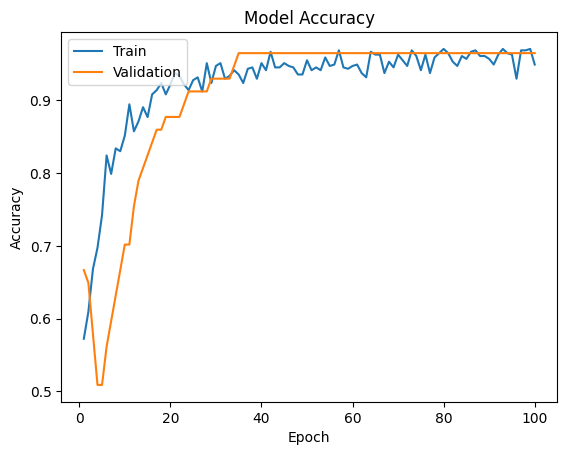

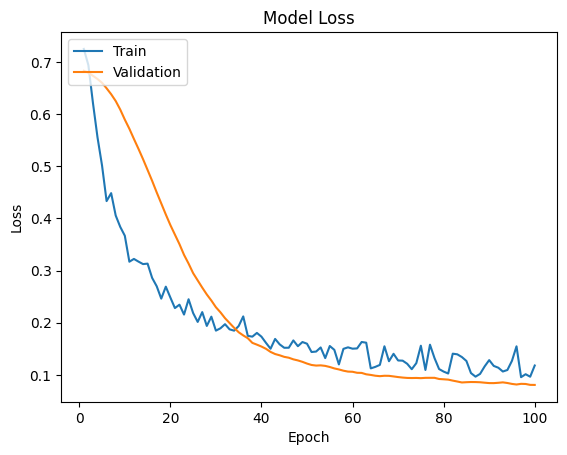

In [26]:
plotLearningCurve(history2,100)

In [27]:
from tensorflow.keras.layers import LSTM

model3 = Sequential()

# LSTM layer with 50 units
model3.add(LSTM(50, activation='tanh', return_sequences=False, input_shape=(30, 1)))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

# Dense layer
model3.add(Dense(32, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

# Output layer for binary classification
model3.add(Dense(1, activation='sigmoid'))


D:\MINU\S-7\deeplearning\project\DeepENV\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           1,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,393 (48.41 KB)

 Trainable params: 12,229 (47.77 KB)

 Non-trainable params: 164 (656.00 B)

In [29]:
model3.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
# Now fit the model with the reshaped 3D data
history3 = model3.fit(X_train,y_train_encoded,epochs=100,verbose=1,validation_data=(X_test,y_test_encoded))


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7509 - loss: 0.5209 - val_accuracy: 0.5789 - val_loss: 0.6900
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8167 - loss: 0.4251 - val_accuracy: 0.7895 - val_loss: 0.6870
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8358 - loss: 0.3709 - val_accuracy: 0.8070 - val_loss: 0.6838
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8507 - loss: 0.3584 - val_accuracy: 0.8070 - val_loss: 0.6799
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8771 - loss: 0.3186 - val_accuracy: 0.8246 - val_loss: 0.6749
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8585 - loss: 0.3072 - val_accuracy: 0.8596 - val_loss: 0.6689
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8687 - loss: 0.3076 - val_accuracy: 0.8596 - val_loss: 0.6621
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8731 - loss: 0.3238 - val_accuracy: 0.8772 - 

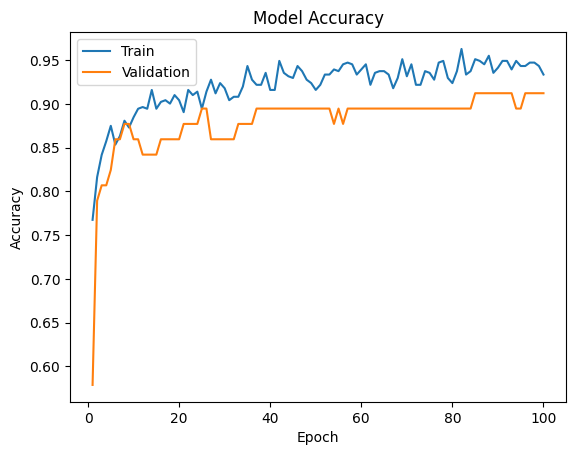

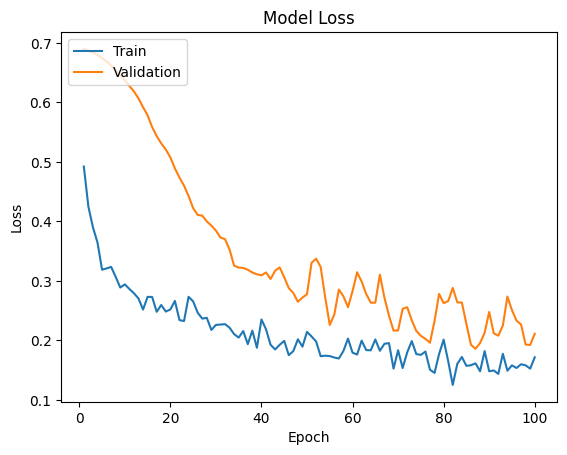

In [31]:
plotLearningCurve(history3,100)

In [32]:
from tensorflow.keras.layers import GRU

model4 = Sequential()

# GRU layer with 50 units
model4.add(GRU(50, activation='tanh', return_sequences=False, input_shape=(30, 1)))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))

# Dense layer
model4.add(Dense(32, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))

# Output layer for binary classification
model4.add(Dense(1, activation='sigmoid'))


In [33]:
model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 50)                  │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           1,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,943 (38.84 KB)

 Trainable params: 9,779 (38.20 KB)

 Non-trainable params: 164 (656.00 B)

In [34]:
model4.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
# Now fit the model with the reshaped 3D data
history4 = model4.fit(X_train,y_train_encoded,epochs=100,verbose=1,validation_data=(X_test,y_test_encoded))


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6808 - loss: 0.6078 - val_accuracy: 0.4035 - val_loss: 0.6920
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7490 - loss: 0.5305 - val_accuracy: 0.4912 - val_loss: 0.6903
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7890 - loss: 0.4823 - val_accuracy: 0.5088 - val_loss: 0.6888
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8198 - loss: 0.4641 - val_accuracy: 0.5088 - val_loss: 0.6870
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8371 - loss: 0.4091 - val_accuracy: 0.5263 - val_loss: 0.6849
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8504 - loss: 0.3900 - val_accuracy: 0.5614 - val_loss: 0.6819
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8478 - loss: 0.4069 - val_accuracy: 0.5614 - val_loss: 0.6793
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8724 - loss: 0.3431 - val_accuracy: 0.5614 - 

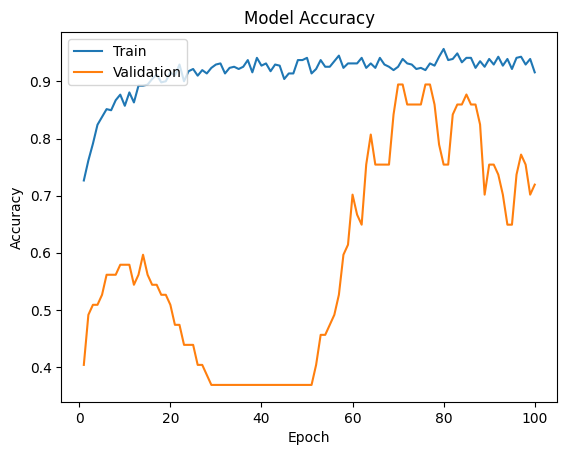

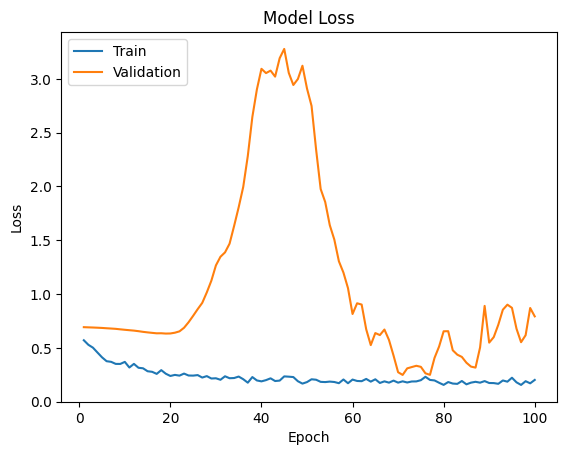

In [36]:
plotLearningCurve(history4,100)

In [37]:
from tensorflow.keras.layers import SimpleRNN

model5 = Sequential()

# RNN layer
model5.add(SimpleRNN(50, activation='tanh', input_shape=(30, 1)))
model5.add(Dropout(0.2))

# Dense layer
model5.add(Dense(32, activation='relu'))
model5.add(Dropout(0.2))

# Output layer
model5.add(Dense(1, activation='sigmoid'))


In [38]:
model5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           1,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,265 (16.66 KB)

 Trainable params: 4,265 (16.66 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model5.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [40]:
# Now fit the model with the reshaped 3D data
history5 = model5.fit(X_train,y_train_encoded,epochs=100,verbose=1,validation_data=(X_test,y_test_encoded))


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6170 - loss: 0.6795 - val_accuracy: 0.6316 - val_loss: 0.6447
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6376 - loss: 0.6427 - val_accuracy: 0.6316 - val_loss: 0.6125
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6649 - loss: 0.6089 - val_accuracy: 0.7895 - val_loss: 0.5800
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7196 - loss: 0.5786 - val_accuracy: 0.8070 - val_loss: 0.5475
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7755 - loss: 0.5410 - val_accuracy: 0.8246 - val_loss: 0.5153
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7872 - loss: 0.5229 - val_accuracy: 0.8070 - val_loss: 0.4693
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8292 - loss: 0.4548 - val_accuracy: 0.8772 - val_loss: 0.3977
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8897 - loss: 0.3630 - val_accuracy: 0.8947 - 

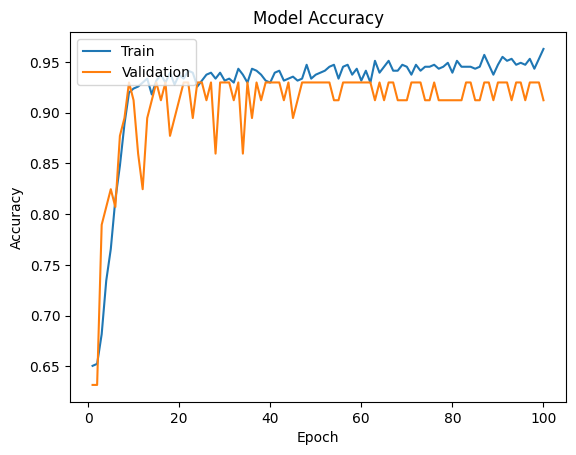

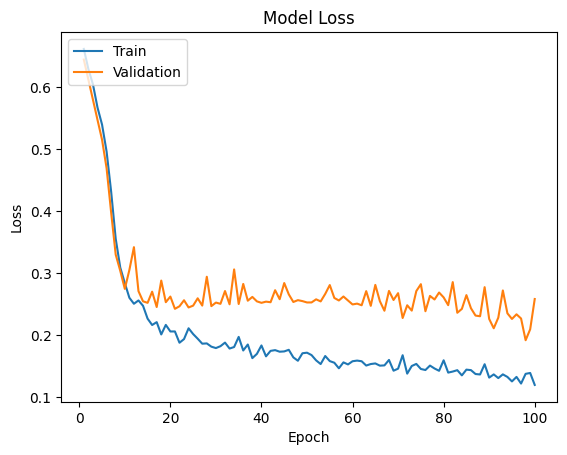

In [41]:
plotLearningCurve(history5,100)

Model 1 (CNN) Accuracy: 94.74%
Model 2 (ANN) Accuracy: 96.49%
Model 3 (LSTM) Accuracy: 91.23%
Model 4 (GRU) Accuracy: 71.93%
Model 5 (RNN) Accuracy: 91.23%


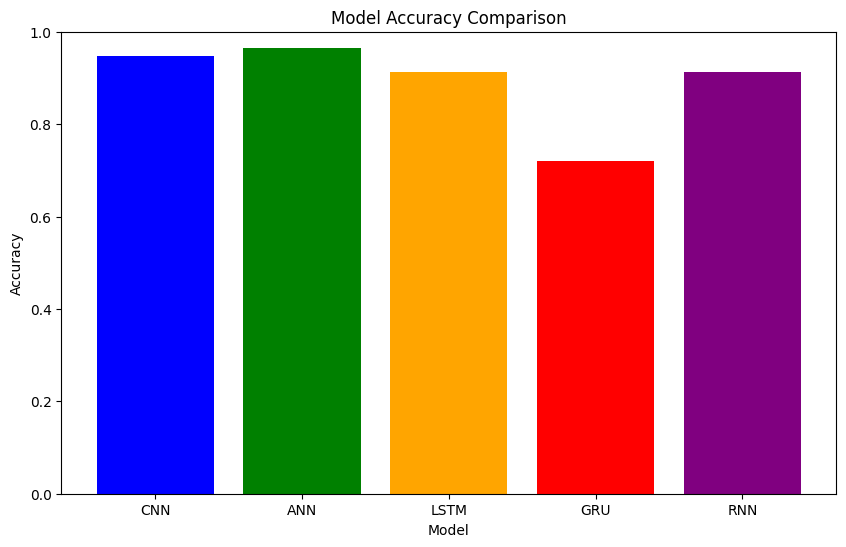

In [45]:
# Model 1 (CNN)
cnn_test_acc = model.evaluate(X_test, y_test_encoded, verbose=0)[1]  # Accuracy of CNN

# Model 2 (ANN) - with reshaping
ann_test_acc = model2.evaluate(X_test, y_test_encoded, verbose=0)[1]  # Accuracy of ANN

# Model 3 (LSTM)
lstm_test_acc = model3.evaluate(X_test, y_test_encoded, verbose=0)[1]  # Accuracy of LSTM

# Model 4 (GRU)
gru_test_acc = model4.evaluate(X_test, y_test_encoded, verbose=0)[1]  # Accuracy of GRU

# Model 5 (RNN)
rnn_test_acc = model5.evaluate(X_test, y_test_encoded, verbose=0)[1]  # Accuracy of RNN

# Print accuracy values
print(f"Model 1 (CNN) Accuracy: {cnn_test_acc * 100:.2f}%")
print(f"Model 2 (ANN) Accuracy: {ann_test_acc * 100:.2f}%")
print(f"Model 3 (LSTM) Accuracy: {lstm_test_acc * 100:.2f}%")
print(f"Model 4 (GRU) Accuracy: {gru_test_acc * 100:.2f}%")
print(f"Model 5 (RNN) Accuracy: {rnn_test_acc * 100:.2f}%")

# Visualize the accuracy comparison
import matplotlib.pyplot as plt

model_names = ['CNN', 'ANN', 'LSTM', 'GRU', 'RNN']
accuracies = [cnn_test_acc, ann_test_acc, lstm_test_acc, gru_test_acc, rnn_test_acc]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()


In [47]:
# CNN predictions
cnn_pred = (model.predict(X_test) > 0.5).astype("int32")

# ANN predictions
ann_pred = (model2.predict(X_test) > 0.5).astype("int32")

# LSTM predictions
lstm_pred = (model3.predict(X_test) > 0.5).astype("int32")

# GRU predictions
gru_pred = (model4.predict(X_test) > 0.5).astype("int32")

# RNN predictions
rnn_pred = (model5.predict(X_test) > 0.5).astype("int32")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001F5BF592700> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


In [49]:
from sklearn.metrics import confusion_matrix

# CNN confusion matrix
cnn_cm = confusion_matrix(y_test_encoded, cnn_pred)

# ANN confusion matrix
ann_cm = confusion_matrix(y_test_encoded, ann_pred)

# LSTM confusion matrix
lstm_cm = confusion_matrix(y_test_encoded, lstm_pred)

# GRU confusion matrix
gru_cm = confusion_matrix(y_test_encoded, gru_pred)

# RNN confusion matrix
rnn_cm = confusion_matrix(y_test_encoded, rnn_pred)

# Optionally, print the confusion matrices
print("Confusion Matrix for CNN:\n", cnn_cm)
print("Confusion Matrix for ANN:\n", ann_cm)
print("Confusion Matrix for LSTM:\n", lstm_cm)
print("Confusion Matrix for GRU:\n", gru_cm)
print("Confusion Matrix for RNN:\n", rnn_cm)


Confusion Matrix for CNN:
 [[34  2]
 [ 1 20]]
Confusion Matrix for ANN:
 [[35  1]
 [ 1 20]]
Confusion Matrix for LSTM:
 [[31  5]
 [ 0 21]]
Confusion Matrix for GRU:
 [[20 16]
 [ 0 21]]
Confusion Matrix for RNN:
 [[32  4]
 [ 1 20]]


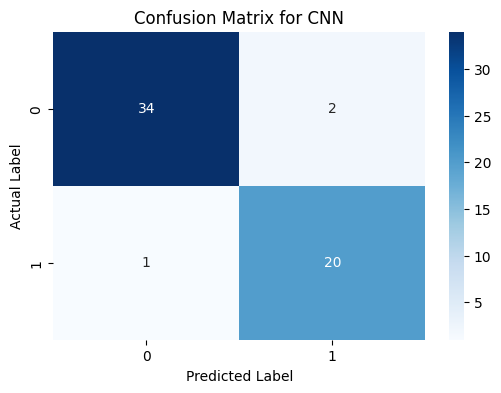

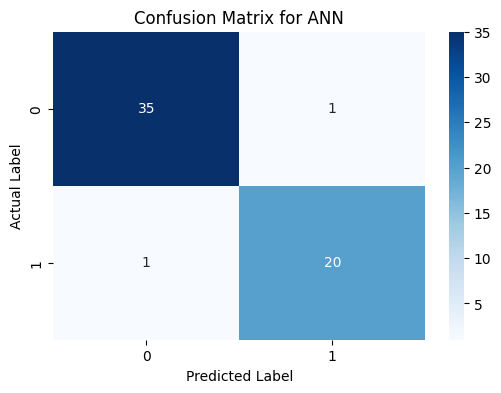

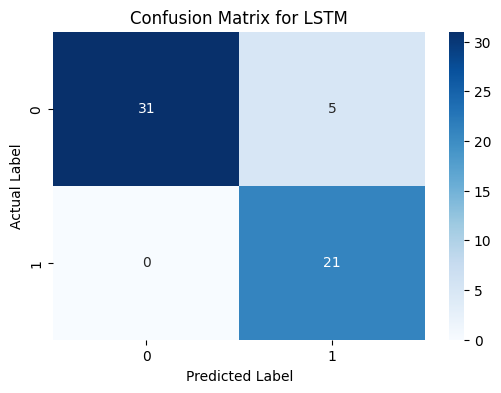

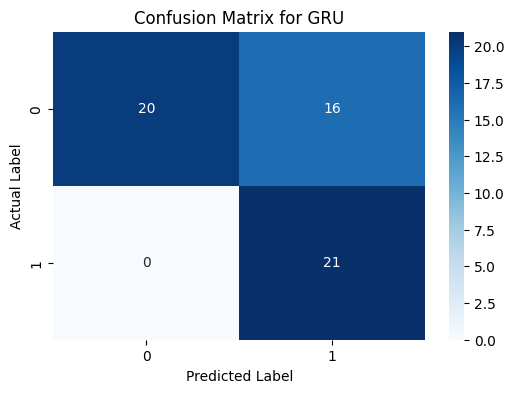

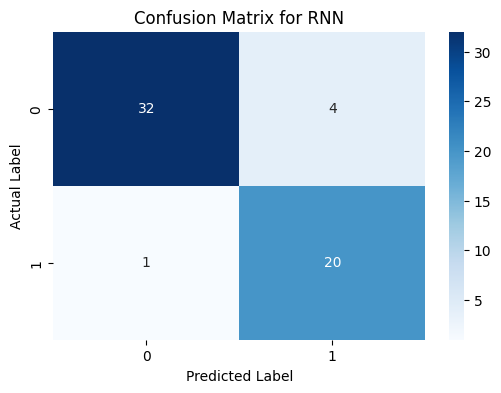

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Plot confusion matrices for all models
plot_confusion_matrix(cnn_cm, "Confusion Matrix for CNN")
plot_confusion_matrix(ann_cm, "Confusion Matrix for ANN")
plot_confusion_matrix(lstm_cm, "Confusion Matrix for LSTM")
plot_confusion_matrix(gru_cm, "Confusion Matrix for GRU")
plot_confusion_matrix(rnn_cm, "Confusion Matrix for RNN")
